In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preprocessing Data and Embedding 

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/data_with_summary.csv')
df.head()

,hotel_name,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,rating_value,review_count,street_address,locality,country,combined_review_rating,hotel_description,hotel_description_length,hotel_description_summary
0,Romance Istanbul Hotel,"An exceptional boutique hotel, great value for...","This boutique hotel exceeded all expectations,...",5.0,February 2020,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023.0,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,"Rating: 5.0, Title: An exceptional boutique ho...",Romance Istanbul Hotel has 39 rooms.Every room...,144,Romance Istanbul Hotel offers 39 elegantly fur...
1,Romance Istanbul Hotel,You can’t get better than this.,An exceptional stay that exceeded all expectat...,5.0,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023.0,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,"Rating: 5.0, Title: You can’t get better than ...",Romance Istanbul Hotel has 39 rooms.Every room...,144,Romance Istanbul Hotel offers 39 elegantly fur...
2,Romance Istanbul Hotel,Exceeds all expectations,This hotel truly goes above and beyond in ever...,5.0,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023.0,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,"Rating: 5.0, Title: Exceeds all expectations",Romance Istanbul Hotel has 39 rooms.Every room...,144,Romance Istanbul Hotel offers 39 elegantly fur...
3,Romance Istanbul Hotel,"Great Location, Fantastic Accommodations",This hotel offers a superb experience with its...,5.0,August 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023.0,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,"Rating: 5.0, Title: Great Location, Fantastic ...",Romance Istanbul Hotel has 39 rooms.Every room...,144,Romance Istanbul Hotel offers 39 elegantly fur...
4,Romance Istanbul Hotel,Perfection. It is all in the details.,Impeccable attention to detail elevates the ex...,5.0,June 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023.0,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,"Rating: 5.0, Title: Perfection. It is all in t...",Romance Istanbul Hotel has 39 rooms.Every room...,144,Romance Istanbul Hotel offers 39 elegantly fur...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5997 entries, 0 to 5996
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hotel_name                 5997 non-null   object 
 1   review_title               5997 non-null   object 
 2   review_text                5997 non-null   object 
 3   rate                       5997 non-null   float64
 4   tripdate                   5997 non-null   object 
 5   hotel_url                  5997 non-null   object 
 6   hotel_image                5997 non-null   object 
 7   price_range                5997 non-null   object 
 8   rating_value               5997 non-null   float64
 9   review_count               5997 non-null   float64
 10  street_address             5997 non-null   object 
 11  locality                   5997 non-null   object 
 12  country                    5997 non-null   object 
 13  combined_review_rating     5997 non-null   objec

In [3]:
# prompt: print all unique length of column
for column in df.columns:
  print("Column: ", column)
  print("Unique Length: ", df[column].unique().size)


Column:  hotel_name
Unique Length:  150
Column:  review_title
Unique Length:  5314
Column:  review_text
Unique Length:  5994
Column:  rate
Unique Length:  10
Column:  tripdate
Unique Length:  76
Column:  hotel_url
Unique Length:  600
Column:  hotel_image
Unique Length:  150
Column:  price_range
Unique Length:  3
Column:  rating_value
Unique Length:  5
Column:  review_count
Unique Length:  147
Column:  street_address
Unique Length:  150
Column:  locality
Unique Length:  5
Column:  country
Unique Length:  5
Column:  combined_review_rating
Unique Length:  5466
Column:  hotel_description
Unique Length:  150
Column:  hotel_description_length
Unique Length:  107
Column:  hotel_description_summary
Unique Length:  150


In [4]:
df = df.drop(['hotel_description_length', 'combined_review_rating'], axis=1)

In [5]:
df = df[['hotel_name', 'hotel_description', 'hotel_description_summary', 'rating_value', 'review_count',
         'review_title' , 'review_text', 'rate', 'tripdate', 'price_range', 'country', 'locality', 'street_address',
         'hotel_url' , 'hotel_image']]
df.head()


,hotel_name,hotel_description,hotel_description_summary,rating_value,review_count,review_title,review_text,rate,tripdate,price_range,country,locality,street_address,hotel_url,hotel_image
0,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Romance Istanbul Hotel offers 39 elegantly fur...,5.0,4023.0,"An exceptional boutique hotel, great value for...","This boutique hotel exceeded all expectations,...",5.0,February 2020,$ (Based on Average Nightly Rates for a Standa...,Turkiye,Istanbul,Hudavendigar Cd. No:5 Sirkeci,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...
1,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Romance Istanbul Hotel offers 39 elegantly fur...,5.0,4023.0,You can’t get better than this.,An exceptional stay that exceeded all expectat...,5.0,March 2021,$ (Based on Average Nightly Rates for a Standa...,Turkiye,Istanbul,Hudavendigar Cd. No:5 Sirkeci,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...
2,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Romance Istanbul Hotel offers 39 elegantly fur...,5.0,4023.0,Exceeds all expectations,This hotel truly goes above and beyond in ever...,5.0,March 2021,$ (Based on Average Nightly Rates for a Standa...,Turkiye,Istanbul,Hudavendigar Cd. No:5 Sirkeci,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...
3,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Romance Istanbul Hotel offers 39 elegantly fur...,5.0,4023.0,"Great Location, Fantastic Accommodations",This hotel offers a superb experience with its...,5.0,August 2021,$ (Based on Average Nightly Rates for a Standa...,Turkiye,Istanbul,Hudavendigar Cd. No:5 Sirkeci,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...
4,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Romance Istanbul Hotel offers 39 elegantly fur...,5.0,4023.0,Perfection. It is all in the details.,Impeccable attention to detail elevates the ex...,5.0,June 2021,$ (Based on Average Nightly Rates for a Standa...,Turkiye,Istanbul,Hudavendigar Cd. No:5 Sirkeci,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...


In [6]:
df['price_range'].unique()

array(['$ (Based on Average Nightly Rates for a Standard Room from our Partners)',
       '$$ (Based on Average Nightly Rates for a Standard Room from our Partners)',
       '$$$ (Based on Average Nightly Rates for a Standard Room from our Partners)'],
      dtype=object)

In [7]:
def classify_price_level(price):
    """Classify price level into 'affordable, moderate, or expensive'."""
    if '$$$' in price:
        return 'expensive, high-end, premium'
    elif '$$' in price:
        return 'moderate, mid-range, reasonable'
    elif '$' in price:
        return 'affordable, budget, economical'
    else:
        return 'unknown'

df['price_range'] = df['price_range'].apply(classify_price_level)

In [8]:
df['price_range'].unique()

array(['affordable, budget, economical',
       'moderate, mid-range, reasonable', 'expensive, high-end, premium'],
      dtype=object)

In [9]:
df['tripdate'] = pd.to_datetime(df['tripdate'].str.strip(), format='%B %Y', errors='coerce')

In [10]:
df['tripdate'] = df['tripdate'].dt.to_period('M').astype(str)


In [11]:
df.head()

,hotel_name,hotel_description,hotel_description_summary,rating_value,review_count,review_title,review_text,rate,tripdate,price_range,country,locality,street_address,hotel_url,hotel_image
0,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Romance Istanbul Hotel offers 39 elegantly fur...,5.0,4023.0,"An exceptional boutique hotel, great value for...","This boutique hotel exceeded all expectations,...",5.0,2020-02,"affordable, budget, economical",Turkiye,Istanbul,Hudavendigar Cd. No:5 Sirkeci,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...
1,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Romance Istanbul Hotel offers 39 elegantly fur...,5.0,4023.0,You can’t get better than this.,An exceptional stay that exceeded all expectat...,5.0,2021-03,"affordable, budget, economical",Turkiye,Istanbul,Hudavendigar Cd. No:5 Sirkeci,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...
2,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Romance Istanbul Hotel offers 39 elegantly fur...,5.0,4023.0,Exceeds all expectations,This hotel truly goes above and beyond in ever...,5.0,2021-03,"affordable, budget, economical",Turkiye,Istanbul,Hudavendigar Cd. No:5 Sirkeci,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...
3,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Romance Istanbul Hotel offers 39 elegantly fur...,5.0,4023.0,"Great Location, Fantastic Accommodations",This hotel offers a superb experience with its...,5.0,2021-08,"affordable, budget, economical",Turkiye,Istanbul,Hudavendigar Cd. No:5 Sirkeci,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...
4,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Romance Istanbul Hotel offers 39 elegantly fur...,5.0,4023.0,Perfection. It is all in the details.,Impeccable attention to detail elevates the ex...,5.0,2021-06,"affordable, budget, economical",Turkiye,Istanbul,Hudavendigar Cd. No:5 Sirkeci,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...


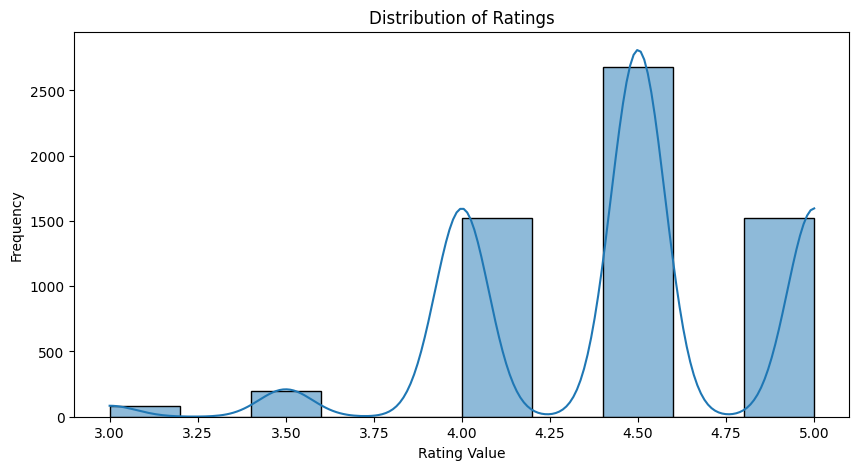

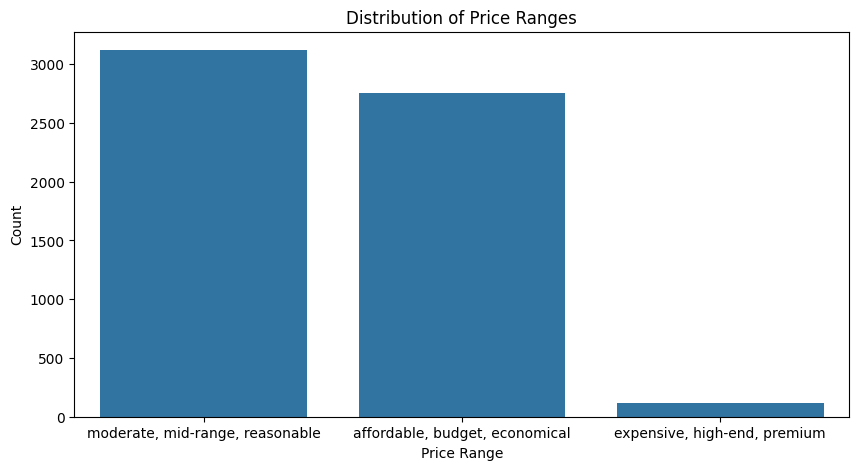

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of ratings
plt.figure(figsize=(10, 5))
sns.histplot(df['rating_value'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Frequency')
plt.show()

# Plot price range distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='price_range', order=df['price_range'].value_counts().index)
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()


In [13]:
df['full_review'] = df['review_title'] + ': ' + df['review_text']

In [14]:
df['full_address'] = df['street_address'] + ', ' + df['locality'] + ', ' + df['country']

In [16]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 7.2 MB/s eta 0:00:00


In [19]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Tokenize and convert to lowercase
    tokens = word_tokenize(text.lower())

    # Keep only alphanumeric tokens (including alphabetic and numeric characters)
    tokens = [word for word in tokens if word.isalnum()]

    # Remove stop words and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    # Join tokens back into a single string
    return ' '.join(tokens)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['description_processed'] = df['hotel_description'].apply(preprocess_text)
df['full_review_processed'] = df['full_review'].apply(preprocess_text)
df['address_processed'] = df['full_address'].apply(preprocess_text)
df['price_processed'] = df['price_range'].apply(preprocess_text)

In [17]:
df.sample(5)

,hotel_name,hotel_description,hotel_description_summary,rating_value,review_count,review_title,review_text,rate,tripdate,price_range,...,locality,street_address,hotel_url,hotel_image,full_review,full_address,description_processed,full_review_processed,address_processed,price_processed
5700,Hotel Tourisme Avenue,Finding an ideal charming 4 stars hotel in Par...,Hotel Tourisme Avenue offers a charming 4-star...,4.5,1671.0,Great hotel in a fantastic neighborhood!,Excellent hotel in a great neighbourhood. We w...,5.00,2023-07,"moderate, mid-range, reasonable",...,Paris,66 avenue de la Motte Picquet,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,Great hotel in a fantastic neighborhood!: Exce...,"66 avenue de la Motte Picquet, Paris, France",find ideal charm 4 star hotel pari difficult w...,great hotel fantast neighborhood excel hotel g...,66 avenu de la mott picquet pari franc,moder reason
5647,Pullman Paris Eiffel Tower Hotel,"Stay at the Pullman Paris Tour Eiffel, the fav...",The Pullman Paris Tour Eiffel offers a conveni...,4.0,3935.0,Fabulous hotel stay,Hotel fabulous location close to the Eiffel...,5.00,2023-12,"moderate, mid-range, reasonable",...,Paris,18 Avenue de Suffren,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,Fabulous hotel stay: Hotel fabulous location c...,"18 Avenue de Suffren, Paris, France",stay pullman pari tour eiffel favorit hotel tr...,fabul hotel stay hotel fabul locat close eiffe...,18 avenu de suffren pari franc,moder reason
5615,Citadines Tour Eiffel Paris,L'apart'hotel Citadines Tour Eiffel Paris est ...,The Citadines Tour Eiffel Paris apart-hotel of...,4.0,471.0,Pleasant stay,"We arrived at the Hotel at 10am, check in was ...",5.00,2022-12,"moderate, mid-range, reasonable",...,Paris,132 boulevard de Grenelle 15th Arr.,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,Pleasant stay: We arrived at the Hotel at 10am...,"132 boulevard de Grenelle 15th Arr., Paris, Fr...",citadin tour eiffel pari est situé sur le boul...,pleasant stay arriv hotel 10am check suppos st...,132 boulevard de grenel 15th pari franc,moder reason
5637,Pullman Paris Eiffel Tower Hotel,"Stay at the Pullman Paris Tour Eiffel, the fav...",The Pullman Paris Tour Eiffel offers a conveni...,4.0,3935.0,Outstanding,This is a great hotel with a perfect location ...,5.00,2023-09,"moderate, mid-range, reasonable",...,Paris,18 Avenue de Suffren,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,Outstanding: This is a great hotel with a perf...,"18 Avenue de Suffren, Paris, France",stay pullman pari tour eiffel favorit hotel tr...,outstand great hotel perfect locat sightse sta...,18 avenu de suffren pari franc,moder reason
2102,Hilton San Francisco Financial District,"Stay in a central location in San Francisco, C...",The Hilton San Francisco Financial District of...,4.0,5006.0,Another badly run Hilton in the US,This Hilton property in the US falls short of ...,4.33,2020-02,"affordable, budget, economical",...,San Francisco,750 Kearny Street,https://www.tripadvisor.com/Hotel_Review-g6071...,https://dynamic-media-cdn.tripadvisor.com/medi...,Another badly run Hilton in the US: This Hilto...,"750 Kearny Street, San Francisco, United States",stay central locat san francisco california su...,anoth badli run hilton us hilton properti us f...,750 kearni street san francisco unit state,afford budget econom


In [18]:
unique_descriptions = df['description_processed'].unique()
print(f"Number of unique descriptions: {len(unique_descriptions)}")
unique_reviews = df['full_review_processed'].unique()
print(f"Number of unique reviews: {len(unique_reviews)}")
unique_addresses = df['address_processed'].unique()
print(f"Number of unique addresses: {len(unique_addresses)}")
unique_prices = df['price_processed'].unique()
print(f"Number of unique prices: {len(unique_prices)}")

Number of unique descriptions: 150
Number of unique reviews: 5995
Number of unique addresses: 150
Number of unique prices: 3


In [19]:
!pip install sentence_transformers

In [20]:
from sentence_transformers import SentenceTransformer
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentenceTransformer("nomic-ai/nomic-embed-text-v1.5" , trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [21]:
def embed_text(texts, model, device, batch_size=32):
    embeddings_list = []
    model.to(device)
    model.eval()
    for start in range(0, len(texts), batch_size):
        end = min(start + batch_size, len(texts))
        batch_texts = texts[start:end]
        with torch.no_grad():
            batch_embeddings = model.encode(batch_texts, convert_to_tensor=True)
            batch_embeddings = batch_embeddings.to(device).cpu().numpy()
        embeddings_list.extend(batch_embeddings)
    return np.array(embeddings_list)

In [22]:
def save_embeddings(texts, filename, model, device):
    embeddings = embed_text(texts, model, device)
    np.save(filename, embeddings)

In [23]:
import numpy as np
# Save embeddings
save_embeddings(unique_descriptions, 'embeddings_descriptions.npy', model, device)
save_embeddings(unique_addresses, 'embeddings_addresses.npy', model, device)
save_embeddings(unique_prices, 'embeddings_prices.npy', model, device)

In [24]:
def load_embeddings(filename):
    return np.load(filename)

In [25]:
embeddings_descriptions = load_embeddings('embeddings_descriptions.npy')
embeddings_addresses = load_embeddings('embeddings_addresses.npy')
embeddings_prices = load_embeddings('embeddings_prices.npy')

In [26]:
# Create mapping from text to embeddings
description_to_embedding = dict(zip(unique_descriptions, embeddings_descriptions))
address_to_embedding = dict(zip(unique_addresses, embeddings_addresses))
price_to_embedding = dict(zip(unique_prices, embeddings_prices))

In [27]:
def get_embedding(text, embedding_dict, model_dim):
    return embedding_dict.get(text, np.zeros(model_dim))

In [28]:
embedding_dim = model.get_sentence_embedding_dimension()
df['embedding_descriptions'] = df['description_processed'].apply(lambda x: get_embedding(x, description_to_embedding, embedding_dim))
df['embedding_addresses'] = df['address_processed'].apply(lambda x: get_embedding(x, address_to_embedding, embedding_dim))
df['embedding_prices'] = df['price_processed'].apply(lambda x: get_embedding(x, price_to_embedding, embedding_dim))

In [29]:
def embed_full_reviews(df, model, device, batch_size=32):
    full_reviews = df['full_review_processed'].tolist()
    embeddings_list = embed_text(full_reviews, model, device, batch_size)
    return embeddings_list

In [30]:
%%time
embeddings_full_review_array = embed_full_reviews(df, model, device)
df['embedding_full_review'] = list(embeddings_full_review_array)

CPU times: user 47 s, sys: 207 ms, total: 47.2 s
Wall time: 57.2 s


In [31]:
df.sample(5)

,hotel_name,hotel_description,hotel_description_summary,rating_value,review_count,review_title,review_text,rate,tripdate,price_range,...,full_review,full_address,description_processed,full_review_processed,address_processed,price_processed,embedding_descriptions,embedding_addresses,embedding_prices,embedding_full_review
2623,Canopy by Hilton London City,Canopy by Hilton London City is an impressive ...,Canopy by Hilton London City is a stylish new ...,5.0,911.0,3 amazing days in Canopy!,"We spent 3 amazing days at Canopy! Georgia, De...",5.00,2023-12,"moderate, mid-range, reasonable",...,3 amazing days in Canopy! : We spent 3 amazing...,"11-15 Minories, London, United Kingdom",canopi hilton london citi impress new hotel lo...,3 amaz day canopi spent 3 amaz day canopi geor...,minori london unit kingdom,moder reason,"[-0.70117855, 0.75697166, -3.6809473, -0.12613...","[-0.07866699, 0.3256071, -3.7898421, -1.125340...","[0.16235323, 0.4613351, -3.2719269, -0.4398266...","[0.031118423, 0.6318265, -4.217355, 0.09739119..."
3499,Palmers Lodge Swiss Cottage,Palmers Lodge Swiss Cottage garners praise for...,Palmers Lodge Swiss Cottage offers clean rooms...,4.0,2133.0,Excellent accommodation hostel,"It's amazing hostel , I recommend it every thi...",5.00,2023-11,"affordable, budget, economical",...,Excellent accommodation hostel : It's amazing ...,"40 College Cres, London, United Kingdom",palmer lodg swiss cottag garner prais cleanli ...,excel accommod hostel amaz hostel recommend ev...,40 colleg cre london unit kingdom,afford budget econom,"[-0.9376102, 1.0186832, -3.6288683, -1.2321209...","[-0.21679592, -0.5376356, -4.0752683, -1.11421...","[0.41714233, 0.93826044, -2.9774604, -0.179409...","[-1.3095641, 1.3902057, -3.449737, 0.36841518,..."
2432,Park Grand London Hyde Park,Experience elegance and luxury at Park Grand H...,Park Grand Hyde Park Hotel combines contempora...,4.5,4166.0,Relaxing,Mr Mubashir gave us a very warm welcoming and...,5.00,2023-12,"affordable, budget, economical",...,Relaxing : Mr Mubashir gave us a very warm we...,"78 - 82 Westbourne Terrace Paddington, London,...",experi eleg luxuri park grand hyde park hotel ...,relax mr mubashir gave us warm welcom staff ki...,78 82 westbourn terrac paddington london unit ...,afford budget econom,"[-0.9192584, 1.7232802, -3.4214063, -0.2609110...","[-0.4918593, -0.2640891, -3.4415865, -1.722679...","[0.41714233, 0.93826044, -2.9774604, -0.179409...","[-0.29889593, 1.6662335, -3.8145454, -0.909224..."
1552,"BEI San Francisco, Trademark Collection by Wyn...","In the heart of San Francisco’s Civic Center, ...",BEI in San Francisco's Civic Center provides a...,4.0,581.0,Delightful stay!,Delightful stay! From the warm welcome to the ...,5.00,2023-11,"affordable, budget, economical",...,Delightful stay!: Delightful stay! From the wa...,"50 8th St, San Francisco, United States",heart san francisco civic center bei destin bu...,delight stay delight stay warm welcom cozi roo...,50 8th st san francisco unit state,afford budget econom,"[-0.5396188, 1.5039314, -3.6813974, 0.72759724...","[-0.121539354, 0.3638302, -2.9874213, 0.153483...","[0.41714233, 0.93826044, -2.9774604, -0.179409...","[-0.34371617, 1.54506, -4.3396707, -0.8498875,..."
634,Sura Hagia Sophia Hotel,"Sura Hagia Sophia Hotel, located in Sultanahme...",The Sura Hagia Sophia Hotel in Istanbul offers...,4.5,934.0,Dr.,The hotel provided a delightful and comfortabl...,4.67,2022-08,"affordable, budget, economical",...,Dr.: The hotel provided a delightful and comfo...,Divanyolu Cd. Alemdar Mah. Ticarethane Sk. No....,sura hagia sophia hotel locat sultanahmet host...,hotel provid delight comfort stay except servi...,divanyolu cd alemdar mah ticarethan sk 10 ista...,afford budget econom,"[-1.0684416, 1.603552, -3.359347, -0.31470433,...","[-0.5890545, 0.49789277, -3.022979, 0.11913945...","[0.41714233, 0.93826044, -2.9774604, -0.179409...","[-0.48204726, 1.1494806, -3.786967, -0.0007931..."


In [32]:
df.to_csv('/content/drive/MyDrive/data_with_embeddings.csv', index=False)

## Search Engine

In [66]:
embeddings_addresses_array = np.vstack(df['embedding_addresses'])
embeddings_prices_array = np.vstack(df['embedding_prices'])
embeddings_full_review_array = np.vstack(df['embedding_full_review'])
embeddings_descriptions_array = np.vstack(df['embedding_descriptions'])

print(embeddings_addresses_array.shape)
print(embeddings_prices_array.shape)
print(embeddings_full_review_array.shape)
print(embeddings_descriptions_array.shape)

(5997, 768)
(5997, 768)
(5997, 768)
(5997, 768)


In [67]:
combined_embeddings = np.hstack([
    embeddings_addresses_array,
    embeddings_prices_array,
    embeddings_full_review_array,
    embeddings_descriptions_array
])

print("Shape of combined_embeddings:", combined_embeddings.shape)

Shape of combined_embeddings: (5997, 3072)


In [34]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Tokenize and convert to lowercase
    tokens = word_tokenize(text.lower())

    # Keep only alphanumeric tokens (including alphabetic and numeric characters)
    tokens = [word for word in tokens if word.isalnum()]

    # Remove stop words and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    # Join tokens back into a single string
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
from sentence_transformers import SentenceTransformer
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentenceTransformer("nomic-ai/nomic-embed-text-v1.5" , trust_remote_code=True)

def embed(text):
    embeddings = model.encode(text, convert_to_tensor=True)
    embeddings = embeddings.to(device)
    return embeddings

In [36]:
query = "A good hotel with a great view on New York"
query_preprocessing = preprocess_text(query)
query_embedding = embed([query]).cpu().numpy()[0]

In [37]:
query_addresses_embedding = embed([query_preprocessing]).cpu().numpy()[0]
query_prices_embedding = embed([query_preprocessing]).cpu().numpy()[0]
query_full_review_embedding = embed([query_preprocessing]).cpu().numpy()[0]
query_descriptions_embedding = embed([query_preprocessing]).cpu().numpy()[0]

In [41]:
query_combined_embedding = np.concatenate([
    query_addresses_embedding,
    query_prices_embedding,
    query_full_review_embedding,
    query_descriptions_embedding
])

In [43]:
query_combined_embedding = query_combined_embedding.reshape(1, -1)
print("Query combined embedding shape after reshaping:", query_combined_embedding.shape)

Query combined embedding shape after reshaping: (1, 3072)


In [123]:
!pip install rank_bm25

In [44]:
from rank_bm25 import BM25Okapi

def bm25_search(df, query, k1=1.5, b=0.75):
    """
    Perform BM25 search across tokenized columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame containing tokenized text columns
    - query: string representing the search query

    Returns:
    - scores: list of BM25 relevance scores for each row in the DataFrame
    """
    # Combine all tokenized fields for BM25 search
    combined_columns = [
        description + full_review + address + price
        for description, full_review, address, price in zip(
            df['description_processed'], df['full_review_processed'], df['address_processed'], df['price_processed']
        )
    ]
    # Initialize BM25 model
    bm25 = BM25Okapi(combined_columns, k1=k1, b=b)

    # Perform search and get relevance scores
    scores = bm25.get_scores(query_preprocessing)

    return scores

In [45]:
scores = bm25_search(df, query_preprocessing, k1=1.5, b=0.75)

In [46]:
scores = np.array(scores)

In [47]:
top_indices = np.argsort(scores)[::-1][:5]

In [48]:
for idx in top_indices:
    row = df.iloc[idx]
    metadata = (
        f"Hotel Name: {row['hotel_name']}\n"
        f"Description: {row['hotel_description_summary']}\n"
        f"Review Title: {row['review_title']}\n"
        f"Review Text: {row['review_text']}\n"
        f"Rating: {row['rate']}\n"
        f"Price Range: {row['price_range']}\n"
        f"Trip Date: {row['tripdate']}\n"
        f"Hotel URL: {row['hotel_url']}\n"
        f"Rating Value: {row['rating_value']}\n"
        f"Review Count: {row['review_count']}\n"
        f"Country: {row['country']}\n"
        f"City: {row['locality']}\n"
        f"Street Address: {row['street_address']}\n"
        f"Hotel Image: {row['hotel_image']}\n"
    )
    print(metadata)
    print("-" * 40)

Hotel Name: Travelodge London City hotel
Description: Travelodge London City offers comfortable, family-friendly accommodation with amenities like flat-screen TVs and free wifi. Enjoy a meal at their on-site restaurant or explore nearby attractions like Covent Garden, the Coca-Cola London Eye, and iconic landmarks like Tower of London.  The hotel's location grants easy access to diverse restaurants and thrilling experiences within walking distance, making it an ideal choice for travelers seeking convenience and comfort in London. 

Review Title: Wonderful stay - nightmare departure!
Review Text: I had a horrendous time trying to vacate my room, the key wouldn’t work, I went to reception 4 times and nobody was willing to help just replace keys which again didn’t work! Turned and wonderful stay into a nightmare!   I had timed my journey via underground - Heathrow express to Heathrow to catch a flight and was quite comfortable with my journey but after 1/2 hour, I was beginning to feel st

In [54]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 9.1 MB/s eta 0:00:00


In [49]:
sentences = df['description_processed'].tolist()
sentences[:5]

['romanc istanbul hotel 39 room elegantli furnish harmon modern life style tradit ottoman touch romanc istanbul sit intersect old citi import part luxuri inspir design landmark old citi locat steep histori surround romanc istanbul hotel welcom except design room turkish hospit colleagu deliv person servic perfectli place perfectli design enhanc istanbul offer room offer privat bathroom shower equip satellit tv free wifi connect room size chang 20 m2 45 m2 includ 7 suit room 1 royal suit 4 grand suit 1 romanc suit 1 premium suit 2 luxuri room terrac 22 delux room 8 citi room',
 'romanc istanbul hotel 39 room elegantli furnish harmon modern life style tradit ottoman touch romanc istanbul sit intersect old citi import part luxuri inspir design landmark old citi locat steep histori surround romanc istanbul hotel welcom except design room turkish hospit colleagu deliv person servic perfectli place perfectli design enhanc istanbul offer room offer privat bathroom shower equip satellit tv fre

In [50]:
embeddings_descriptions_array.shape

(5997, 768)

In [51]:
query_embedding.shape

(768,)

In [52]:
import faiss
dimension = embeddings_descriptions_array.shape[1]
index = faiss.IndexFlatL2(dimension)

In [53]:
index.is_trained

True

In [54]:
index.add(embeddings_descriptions_array)

In [55]:
k = 5

In [56]:
query_embedding = np.array([query_embedding], dtype=np.float32)

In [57]:
D, I = index.search(query_embedding, k)
print(I)

[[4281 4282 4283 4284 4280]]


In [58]:
top_indices = I[0]

for idx in top_indices:
    row = df.iloc[idx]
    metadata = (
        f"Hotel Name: {row['hotel_name']}\n"
        f"Description: {row['hotel_description_summary']}\n"
        f"Review Title: {row['review_title']}\n"
        f"Review Text: {row['review_text']}\n"
        f"Rating: {row['rate']}\n"
        f"Price Range: {row['price_range']}\n"
        f"Trip Date: {row['tripdate']}\n"
        f"Hotel URL: {row['hotel_url']}\n"
        f"Rating Value: {row['rating_value']}\n"
        f"Review Count: {row['review_count']}\n"
        f"Country: {row['country']}\n"
        f"City: {row['locality']}\n"
        f"Street Address: {row['street_address']}\n"
        f"Hotel Image: {row['hotel_image']}\n"
    )
    print(metadata)
    print("-" * 40)

Hotel Name: The New Yorker, A Wyndham Hotel
Description: The New Yorker Hotel offers a luxurious experience with its recently renovated rooms and suites.  Designed for modern-day business travelers, the hotel provides the comforts of the future while preserving its historic charm in the heart of New York City. 

Review Title: Dark and Dirty.  Avoid the room upgrade option.
Review Text: I will not visit this property again.  The room couldn't be any smaller.  The hallways are dark and dirty with carpet taped together.  Prior to arrival I had the option to pay an additional fee for a room upgrade (slightly larger with a city view).  My view was of an alley and the room was much smaller than the pictures online.  The front desk was not helpful in resolving this issue.  The location was good (close to MSG and Penn Station), but not worth the stay at this property.  
Rating: 1.0
Price Range: moderate, mid-range, reasonable
Trip Date: 2024-01
Hotel URL: https://www.tripadvisor.com/Hotel_Revi

In [68]:
combined_dimension = combined_embeddings.shape[1]

In [70]:
nlist = 50
quantizer = faiss.IndexFlatL2(combined_dimension)
index = faiss.IndexIVFFlat(quantizer, combined_dimension, nlist)

In [71]:
index.is_trained

False

In [72]:
index.train(combined_embeddings)
index.is_trained

True

In [73]:
index.add(combined_embeddings)
index.ntotal

5997

In [74]:
index.nprobe =1000

In [75]:
k = 5
D, I = index.search(query_combined_embedding, k)

In [76]:
I

array([[4287, 4311, 4318, 4290, 4292]])

In [77]:
top_indices = I[0]

for idx in top_indices:
    row = df.iloc[idx]
    metadata = (
        f"Hotel Name: {row['hotel_name']}\n"
        f"Description: {row['hotel_description_summary']}\n"
        f"Review Title: {row['review_title']}\n"
        f"Review Text: {row['review_text']}\n"
        f"Rating: {row['rate']}\n"
        f"Price Range: {row['price_range']}\n"
        f"Trip Date: {row['tripdate']}\n"
        f"Hotel URL: {row['hotel_url']}\n"
        f"Rating Value: {row['rating_value']}\n"
        f"Review Count: {row['review_count']}\n"
        f"Country: {row['country']}\n"
        f"City: {row['locality']}\n"
        f"Street Address: {row['street_address']}\n"
        f"Hotel Image: {row['hotel_image']}\n"
    )
    print(metadata)
    print("-" * 40)

Hotel Name: The New Yorker, A Wyndham Hotel
Description: The New Yorker Hotel offers a luxurious experience with its recently renovated rooms and suites.  Designed for modern-day business travelers, the hotel provides the comforts of the future while preserving its historic charm in the heart of New York City. 

Review Title: The New Yorker
Review Text: Great location. Very clean rooms. Great view. It is definitely a hotel that I will visit again. The personnel were very friendly and helpful, it was a real pleasure to be there. The bathroom was outdated but that just added some charm. 
Rating: 5.0
Price Range: moderate, mid-range, reasonable
Trip Date: 2023-12
Hotel URL: https://www.tripadvisor.com/Hotel_Review-g60763-d122005-Reviews-The_New_Yorker_A_Wyndham_Hotel-New_York_City_New_York.html
Rating Value: 4.0
Review Count: 16122.0
Country: United States
City: New York City
Street Address: 481 8th Avenue & 34th Street
Hotel Image: https://media-cdn.tripadvisor.com/media/photo-s/22/4e/37

In [89]:
def faiss_search(combined_embeddings, query_embedding, k=5, nlist=50, nprobe=100, df=None):
    """
    Perform Faiss search using combined embeddings.

    Parameters:
    - combined_embeddings: numpy array of combined embeddings (shape: [n_samples, embedding_dim])
    - query_embedding: numpy array of the query embedding (shape: [embedding_dim,])
    - k: int, number of nearest neighbors to return (default is 5)
    - nlist: int, number of clusters for IVF (default is 50)
    - nprobe: int, number of clusters to search (default is 100)
    - df: pandas DataFrame containing metadata for the embeddings

    Returns:
    - metadata: List of strings with metadata for the top k results
    """
    # Get the dimension of combined embeddings
    combined_dimension = combined_embeddings.shape[1]

    # Initialize and train Faiss index
    quantizer = faiss.IndexFlatL2(combined_dimension)
    index = faiss.IndexIVFFlat(quantizer, combined_dimension, nlist)

    # Train the index
    index.train(combined_embeddings)
    assert index.is_trained, "Index failed to train properly."

    # Add embeddings to the index
    index.add(combined_embeddings)
    index.nprobe = nprobe  # Set nprobe to control the number of clusters to search

    # Reshape query embedding for Faiss
    query_combined_embedding = query_embedding.reshape(1, -1)

    # Perform search
    _, I = index.search(query_combined_embedding, k)

    # Retrieve metadata for top results
    metadata = []
    if df is not None:
        for idx in I[0]:
            row = df.iloc[idx]
            metadata.append(
                f"Hotel Name: {row['hotel_name']}\n"
                f"Description: {row['hotel_description_summary']}\n\n"
                f"Review Title: {row['review_title']}\n"
                f"Review Text: {row['review_text']}\n"
                f"Rating: {row['rate']}\n"
                f"Price Range: {row['price_range']}\n"
                f"Trip Date: {row['tripdate']}\n"
                f"Hotel URL: {row['hotel_url']}\n"
                f"Rating Value: {row['rating_value']}\n"
                f"Review Count: {row['review_count']}\n"
                f"Country: {row['country']}\n"
                f"City: {row['locality']}\n"
                f"Street Address: {row['street_address']}\n"
                f"Hotel Image: {row['hotel_image']}\n"
            )

    return metadata

In [90]:
top_results = faiss_search(combined_embeddings, query_combined_embedding, k=5, nlist=50, nprobe=100, df=df)

In [91]:
for result in top_results:
    print(result)
    print("-" * 40)

Hotel Name: The New Yorker, A Wyndham Hotel
Description: The New Yorker Hotel offers a luxurious experience with its recently renovated rooms and suites.  Designed for modern-day business travelers, the hotel provides the comforts of the future while preserving its historic charm in the heart of New York City. 


Review Title: The New Yorker
Review Text: Great location. Very clean rooms. Great view. It is definitely a hotel that I will visit again. The personnel were very friendly and helpful, it was a real pleasure to be there. The bathroom was outdated but that just added some charm. 
Rating: 5.0
Price Range: moderate, mid-range, reasonable
Trip Date: 2023-12
Hotel URL: https://www.tripadvisor.com/Hotel_Review-g60763-d122005-Reviews-The_New_Yorker_A_Wyndham_Hotel-New_York_City_New_York.html
Rating Value: 4.0
Review Count: 16122.0
Country: United States
City: New York City
Street Address: 481 8th Avenue & 34th Street
Hotel Image: https://media-cdn.tripadvisor.com/media/photo-s/22/4e/3

In [98]:
def faiss_bm25(df, query, k1=1.5, b=0.75, combined_embeddings=None, query_embedding=None, k=5, nlist=50, nprobe=100, bm25_weight=0.3, faiss_weight=0.7):
    """
    Perform a hybrid search using both BM25 and Faiss with weighted scores.

    Parameters:
    - df: pandas DataFrame containing tokenized text columns and embeddings
    - query: string representing the search query
    - k1: BM25 parameter k1
    - b: BM25 parameter b
    - combined_embeddings: numpy array with combined embeddings for Faiss
    - query_embedding: numpy array with query embedding for Faiss
    - k: number of top results to retrieve from Faiss
    - nlist: number of clusters for the Faiss index
    - nprobe: number of clusters to search in Faiss
    - bm25_weight: weight for BM25 scores
    - faiss_weight: weight for Faiss scores

    Returns:
    - metadata: List of dictionaries with metadata for the top k results
    """

    # Combine all tokenized fields for BM25 search
    combined_columns = [
        description + " " + full_review + " " + address + " " + price
        for description, full_review, address, price in zip(
            df['description_processed'], df['full_review_processed'], df['address_processed'], df['price_processed']
        )
    ]

    # Initialize and run BM25 model
    bm25 = BM25Okapi(combined_columns, k1=k1, b=b)
    query_preprocessing = preprocess_text(query)
    bm25_scores = bm25.get_scores(query_preprocessing)

    # Initialize and train Faiss index
    combined_dimension = combined_embeddings.shape[1]
    quantizer = faiss.IndexFlatL2(combined_dimension)
    index = faiss.IndexIVFFlat(quantizer, combined_dimension, nlist)

    # Train the index
    index.train(combined_embeddings)
    assert index.is_trained, "Faiss index failed to train properly."

    # Add embeddings to the index
    index.add(combined_embeddings)
    index.nprobe = nprobe  # Set nprobe to control the number of clusters to search

    # Perform Faiss search
    query_combined_embedding = query_embedding.reshape(1, -1)
    _, faiss_indices = index.search(query_combined_embedding, k)

    # Combine BM25 and Faiss results
    faiss_scores = np.zeros(len(df))
    for idx in faiss_indices[0]:
        faiss_scores[idx] = 1  # Assign a dummy score of 1 for Faiss results

    # Normalize scores
    faiss_scores = (faiss_scores - faiss_scores.min()) / (faiss_scores.max() - faiss_scores.min())

    # Weighted combination of BM25 and Faiss scores
    combined_scores = bm25_weight * np.array(bm25_scores) + faiss_weight * faiss_scores

    # Get top k results based on combined scores
    top_k_indices = np.argsort(-combined_scores)[:k]

    # Retrieve and return metadata for top results
    metadata = []
    for idx in top_k_indices:
        row = df.iloc[idx]
        metadata.append(
                f"Hotel Name: {row['hotel_name']}\n"
                f"Description: {row['hotel_description_summary']}\n\n"
                f"Review Title: {row['review_title']}\n"
                f"Review Text: {row['review_text']}\n"
                f"Rating: {row['rate']}\n"
                f"Price Range: {row['price_range']}\n"
                f"Trip Date: {row['tripdate']}\n"
                f"Hotel URL: {row['hotel_url']}\n"
                f"Rating Value: {row['rating_value']}\n"
                f"Review Count: {row['review_count']}\n"
                f"Country: {row['country']}\n"
                f"City: {row['locality']}\n"
                f"Street Address: {row['street_address']}\n"
                f"Hotel Image: {row['hotel_image']}\n"
        )

    return metadata

In [99]:
top_results = faiss_bm25(df, query, k1=1.5, b=0.75, combined_embeddings=combined_embeddings, query_embedding=query_combined_embedding, k=5, nlist=50, nprobe=100)

In [100]:
for result in top_results:
    print(result)
    print("-" * 40)

Hotel Name: The New Yorker, A Wyndham Hotel
Description: The New Yorker Hotel offers a luxurious experience with its recently renovated rooms and suites.  Designed for modern-day business travelers, the hotel provides the comforts of the future while preserving its historic charm in the heart of New York City. 


Review Title: Another great stay at The New Yorker Hotel
Review Text: Stayed at The New Yorker Hotel from 7/12/2023-14/12/2023. This was my second stay at this Hotel, and again it did not disappoint. Special mention to Charmaine  at check-in. Thank you for allocating us room 1911 . The room was spacious for two people, we had two large extremely comfortable beds, we had a closet each, great for storing our stash of shopping. This room also has a view of The Edge. Also a mention to Marguerita from Housekeeping who did a great job! Thank you for helping me to the elevator with my luggage. The Hotel is within easy walking distance to many sightseeing attractions and shops. There 